In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
#這邊是先將資料載入後做統一格式的前處理
# https://www.investing.com/etfs/yuanta-p-shares-taiwan-top-50
Data=pd.read_csv("0050 ETF Stock Price History.csv") #載入csv
#Data #show data

In [4]:
Data['Date'] = pd.to_datetime(Data['Date']) #將原始資料的時間轉為pandas的Time Series序列
Data.index=Data.Date
Data=Data.drop(['Date'],axis=1)
Data=Data.iloc[::-1] #因為原始資料的前後順序相反了 所以將資料倒過來
Data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-01-02,58.55,58.70,58.75,58.35,10.76M,-0.26%
2014-01-03,57.85,58.45,58.45,57.70,14.51M,-1.20%
2014-01-06,57.70,57.75,57.95,57.55,14.87M,-0.26%
2014-01-07,57.70,57.75,57.90,57.70,13.13M,0.00%
2014-01-08,57.80,57.70,57.95,57.70,7.61M,0.17%
...,...,...,...,...,...,...
2023-10-30,122.00,122.40,122.85,121.75,9.79M,-0.25%
2023-10-31,121.15,122.40,122.45,121.10,11.95M,-0.70%
2023-11-01,121.75,122.00,122.15,121.25,4.85M,0.50%


In [5]:
#vol. string改為float
def convert_vol_to_int(vol_str):
    multiplier = 1
    if 'K' in vol_str:
        multiplier = 10**3
    elif 'M' in vol_str:
        multiplier = 10**6
    elif 'B' in vol_str:
        multiplier = 10**9
    return int(float(vol_str.replace('K', '').replace('M', '').replace('B', '')) * multiplier)

Data['Vol.'] = Data['Vol.'].apply(convert_vol_to_int)


In [6]:
# change % 改為float
Data['Change %'] = Data['Change %'].str.rstrip('%').astype('float') / 100.0

In [7]:
#Data
#Data.plot()
#Data.Price.loc['2019'].plot()

In [8]:
# 假設有一個包含特徵和價格的資料框 Data
features = ['Open', 'High', 'Low', 'Vol.', 'Change %']
X = Data[features]
y = Data['Price']

# 將資料分為訓練和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立並訓練隨機森林回歸模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測價格
predictions = model.predict(X_test)

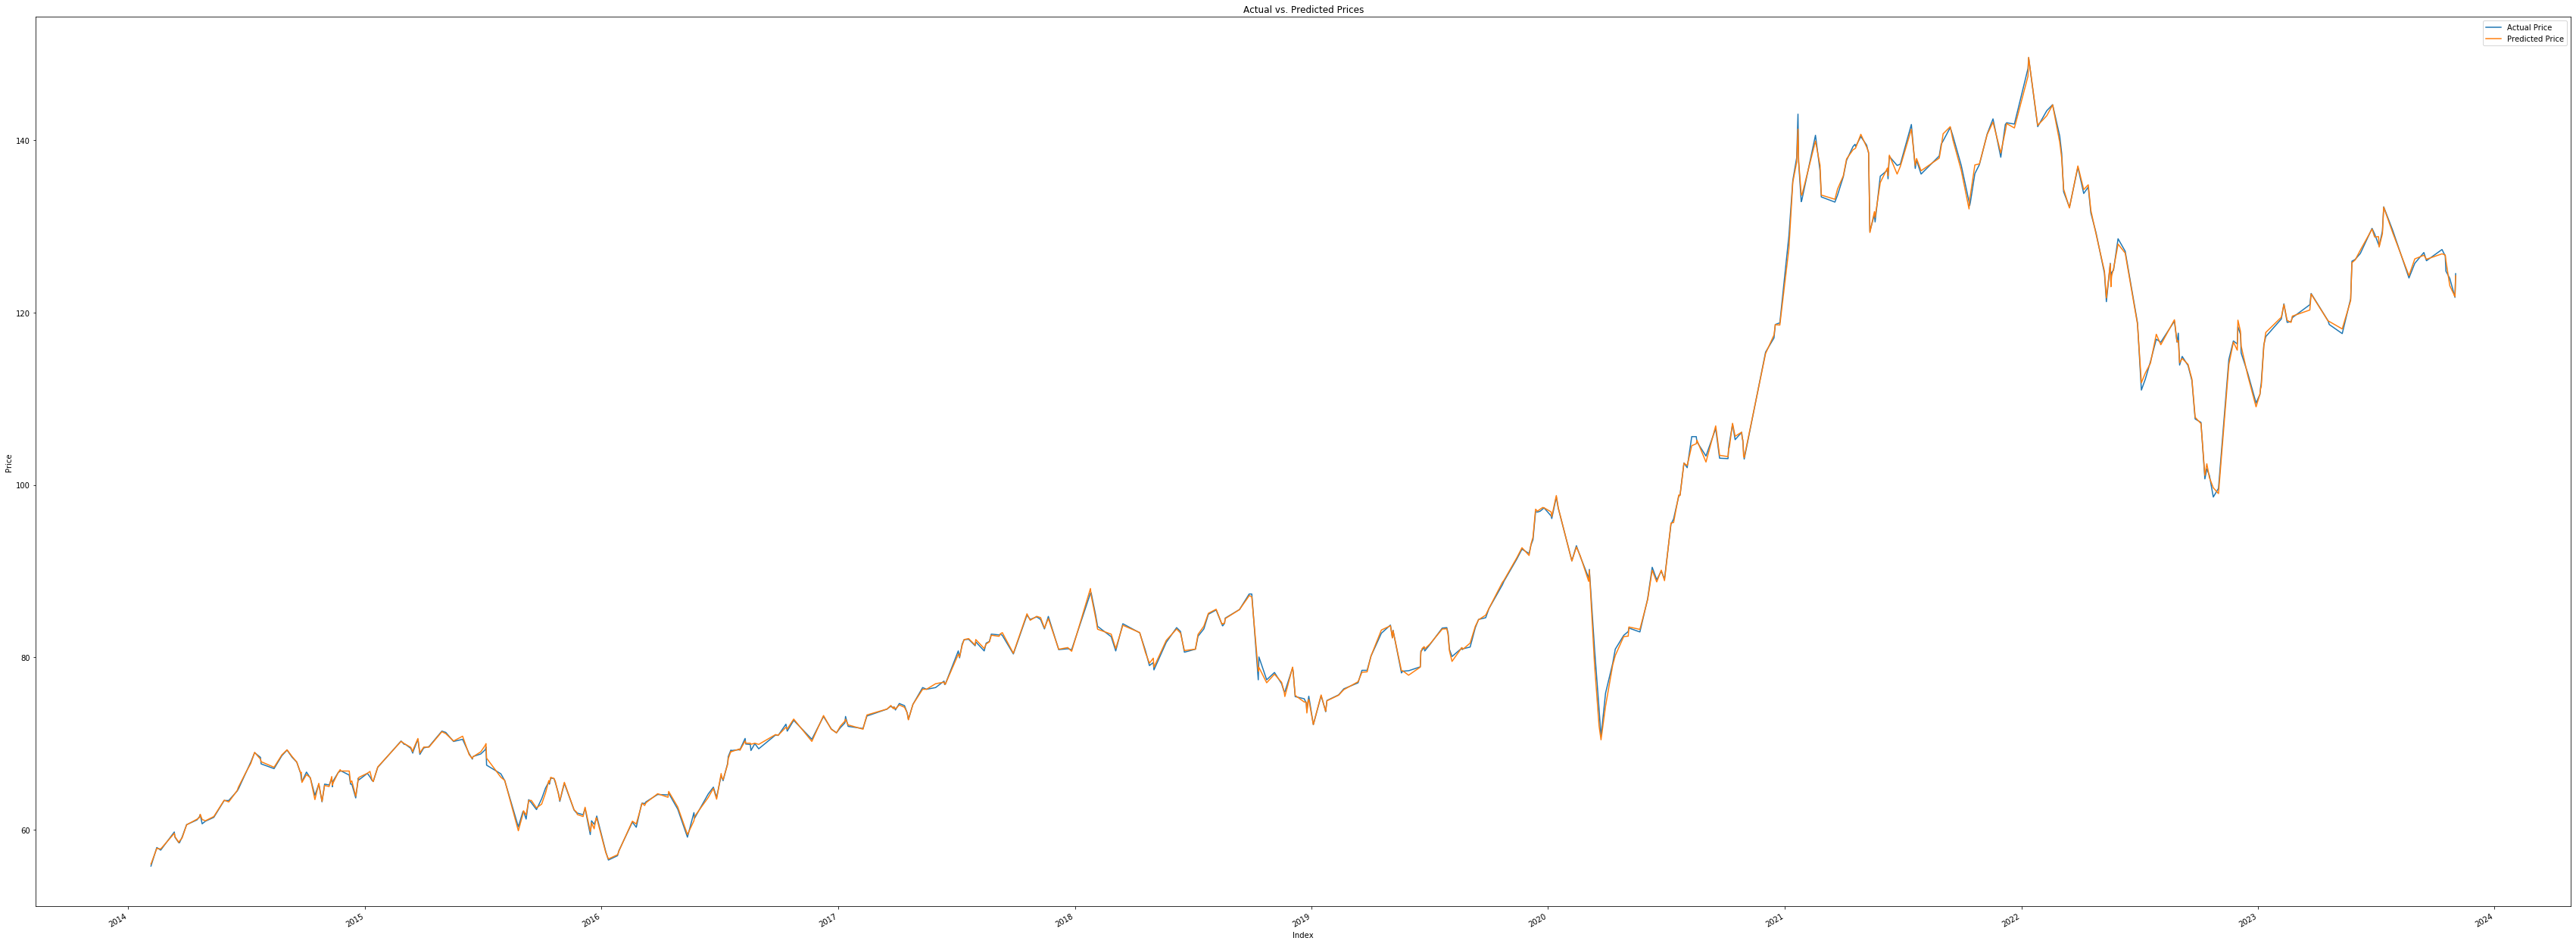

In [9]:
# 合併實際價格和預測價格到同一個資料框
result_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})

# 繪製價格對比圖
result_df.plot(figsize=(60,24), title='Actual vs. Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
# 計算 R2 分數
r2_score_value = r2_score(y_test, predictions)
print(f'R2 Score: {r2_score_value}')

R2 Score: 0.9997980640298204
